<a href="https://colab.research.google.com/github/tnthdrhks1/knu_machine_learning/blob/main/1218_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.model_selection import train_test_split 

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
tf.test.gpu_device_name() #gpu 뭐냐

'/device:GPU:0'

In [ ]:
tf.test.is_gpu_available() #gpu 지원하냐

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
mnist = tf.keras.datasets.mnist
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[x_train>0], np.max(x_train)

(array([0.01176471, 0.07058824, 0.07058824, ..., 0.75686275, 0.77254902,
        0.5254902 ]), 1.0)

In [ ]:
x_test.shape, x_train.shape

((10000, 28, 28), (60000, 28, 28))

In [ ]:
np.set_printoptions(3, linewidth=75+100)
x_test[0]

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 

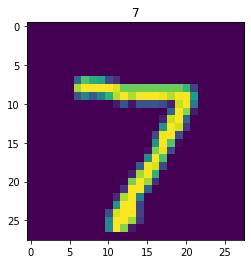

In [ ]:
plt.title(str(y_test[0]))
plt.imshow(x_test[0])

In [ ]:
x_train_2d = x_train.reshape(-1,28*28)
x_test_2d = x_test.reshape(-1,28*28)
y_train.shape, x_train_2d.shape, x_test_2d.shape

X_norm = (x_train_2d - np.min(x_train_2d))/(np.max(x_train_2d)-np.min(x_train_2d)) #정규 분포화 완료

#SGD
- (0.9202666666666667, 0.919)


In [ ]:
#SGD 로 학습시키고 성능측정
model = SGDClassifier().fit(X_norm, y_train)
model.score(X_norm, y_train), model.score(x_test_2d, y_test)

(0.9217833333333333, 0.9173)

# tf

In [ ]:
# 모델 정의, 컴파일
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'), #128개의 뉴런과 입력데이터를 완전히 연결해라, fully connected
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax') #10개의 뉴런 생성 , 클래스 개수 (0~9)
# ])

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax') #10개의 뉴런 생성 , 클래스 개수 (0~9)
])
# [0.2682524025440216, 0.9253000020980835]

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5) #학습
model.evaluate(x_test,  y_test, verbose=2) #성능측정

Epoch 1/5
1875/1875 [==============================] - 5s 1ms/step - loss: 0.7369 - accuracy: 0.8065
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3140 - accuracy: 0.9102
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2910 - accuracy: 0.9190
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2705 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9251
313/313 - 0s - loss: 0.2717 - accuracy: 0.9254


[0.27166807651519775, 0.9254000186920166]

In [ ]:
y_test.shape

(10000,)

# mpg Linear
- (0.8741292449969315, 0.8549837991587409)


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df = pd.read_csv(url, na_values= "?", comment='\t',sep=' ',skipinitialspace=True)
df

,18.0,8,307.0,130.0,3504.,12.0,70,1
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1
393,44.0,4,97.0,52.0,2130.0,24.6,82,2
394,32.0,4,135.0,84.0,2295.0,11.6,82,1
395,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
coloums = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']
df.columns = coloums
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1
393,44.0,4,97.0,52.0,2130.0,24.6,82,2
394,32.0,4,135.0,84.0,2295.0,11.6,82,1
395,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
df.isna().sum()
df = df.dropna()

In [ ]:
df['cylinders'] = df['cylinders'].astype(np.str)
df['model year'] = df['model year'].astype(np.str)
df['origin'] = df['origin'].astype(np.str)

df = pd.get_dummies(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
y = df['mpg']
x = df.drop('mpg',axis=1)
x.shape, y.shape

((391, 25), (391,))

In [ ]:
x_norm = (x - np.min(x))/(np.max(x) - np.min(x))
x_norm

,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82,origin_1,origin_2,origin_3
0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.932817,0.826087,0.773462,0.119048,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.186047,0.217391,0.333711,0.452381,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
393,0.074935,0.032609,0.146583,0.988095,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
394,0.173127,0.206522,0.193365,0.214286,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
395,0.134367,0.179348,0.286929,0.630952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f375ec28048>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f375ebbba90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f375eb6add8>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f375eba3198>,
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f375eb02898>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f375eaafc18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f375eadff60>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f375eadffd0>,
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f375e9f8a20>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f375e9abda0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f375e96a160>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f375e99d4e0>,
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f375e900be0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f375e8b4f60>,
        <matplotlib.

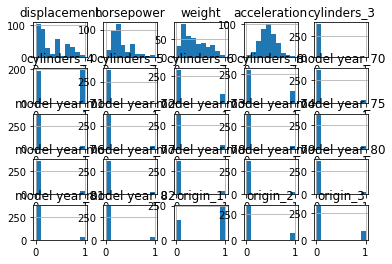

In [ ]:
x_norm.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 396
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            391 non-null    float64
 1   displacement   391 non-null    float64
 2   horsepower     391 non-null    float64
 3   weight         391 non-null    float64
 4   acceleration   391 non-null    float64
 5   cylinders_3    391 non-null    uint8  
 6   cylinders_4    391 non-null    uint8  
 7   cylinders_5    391 non-null    uint8  
 8   cylinders_6    391 non-null    uint8  
 9   cylinders_8    391 non-null    uint8  
 10  model year_70  391 non-null    uint8  
 11  model year_71  391 non-null    uint8  
 12  model year_72  391 non-null    uint8  
 13  model year_73  391 non-null    uint8  
 14  model year_74  391 non-null    uint8  
 15  model year_75  391 non-null    uint8  
 16  model year_76  391 non-null    uint8  
 17  model year_77  391 non-null    uint8  
 18  model year

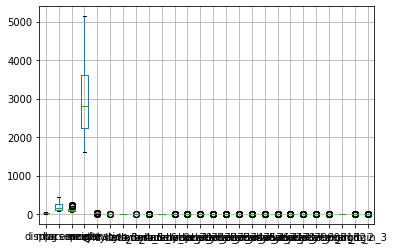

In [ ]:
df.boxplot()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((261, 25), (130, 25), (261,), (130,))

In [ ]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8741292449969315, 0.8549837991587409)

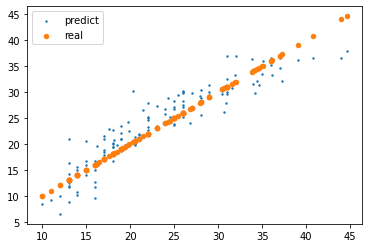

In [ ]:
plt.scatter(y_test,model.predict(X_test),s=2,label="predict")
plt.scatter(y_test,y_test,s=20,label='real')
plt.legend()

# MPG TF

In [ ]:
from tensorflow import keras
import seaborn as sns
from tensorflow.keras import layers

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
origin = dataset.pop('Origin')

In [ ]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

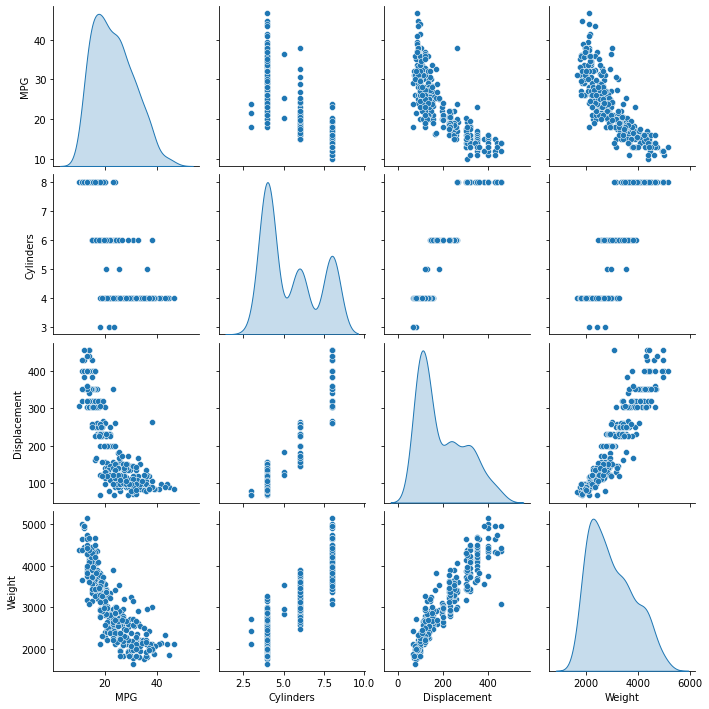

In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.083],
       [ 0.004],
       [ 0.296],
       [-0.121],
       [ 0.118],
       [ 0.115],
       [ 0.153],
       [ 0.17 ],
       [ 0.035],
       [ 0.106]], dtype=float32)

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.840163,1.066181,2.840163,10.033094,2.493597,10.033094,995
996,2.963108,1.133694,2.963108,10.278105,2.506148,10.278105,996
997,2.852781,1.106449,2.852781,9.956973,2.477333,9.956973,997
998,2.753555,1.072413,2.753555,9.855435,2.460585,9.855435,998
999,2.752348,1.067544,2.752348,9.946606,2.469064,9.946606,999


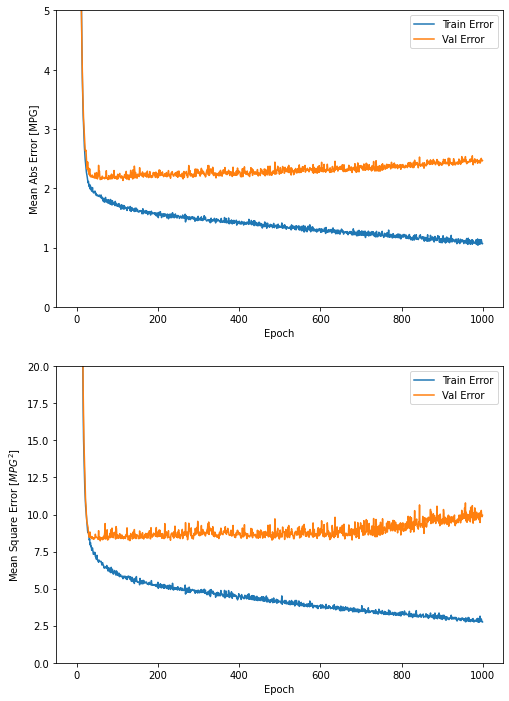

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)